In [1]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

0.25.1
1.17.2


In [2]:
# 创建Series
# 从列表创建
arr = [0, 1, 2, 3, 4]
series = pd.Series(arr)
print(series)
# 从字典创建
d = {'a':1, 'b':2, 'c':3, 'd':4}
series = pd.Series(d)
print(series)
# 创建DataFrame
# 从numpy数组创建
dates = pd.date_range('today', periods=6)  # 定义时间序列作为index
num_arr = np.random.randn(6, 4)  # 传入numpy随机数组
columns = ['A', 'B', 'C', 'D']   # 将列表作为列名
df = pd.DataFrame(num_arr, index=dates, columns=columns)
print(df)
# 从CSV文件创建
df = pd.read_csv('../NLP/data/home_news.csv', encoding='utf-8', sep=',')
print(df[:10])
# 从字典对象创建
data = {'animal':['cat', 'dog', 'snake', 'cat', 'dog', 'snake'],
        'age':[6, 8, 3, 7, 9, 2],
        'visits':[1, 2, 3, 8, 6, 4],
        'priority': ['high', 'medium', 'low', 'high', 'medium', 'low']}
labels = ['a', 'b', 'c', 'd', 'e', 'f']
df = pd.DataFrame(data, index=labels)
print(df)



0    0
1    1
2    2
3    3
4    4
dtype: int64
a    1
b    2
c    3
d    4
dtype: int64
                                   A         B         C         D
2020-07-14 22:03:33.809945  0.833424 -0.034888  0.713554  0.512712
2020-07-15 22:03:33.809945 -0.396445  0.645578 -0.615790 -0.719845
2020-07-16 22:03:33.809945 -0.724532  0.179583  0.907842  0.213786
2020-07-17 22:03:33.809945  0.473236  0.954645  0.861597 -0.639780
2020-07-18 22:03:33.809945 -0.584533  0.917074  0.941831 -1.265752
2020-07-19 22:03:33.809945  0.478569 -0.726414  1.429513  0.242676
   Unnamed: 0                                            content
0           0  　　,中新网,1月8日电 综合报道，入冬以来，我国多个地区连续经历了重污染天气过程，多个城市...
1           1                        　　,【极端不利气象条件导致近期京津冀霾天气多发重发】
2           2  　　中国气象局7日举行近期霾天气气象成因媒体通气会，专家介绍，全球气候变暖背景下极端不利的气...
3           3  　　2016年11月以来，我国京津冀地区共发生7次持续性中到重度霾天气过程。冷空气不活跃、平...
4           4  　　预计1月8日至14日，气象条件整体有利于污染物的扩散，京津冀地区无持续性雾和霾天气，但1...
5           5                     　　,【环保部部长回应重污染天气热点

In [3]:
# 显示df的基本信息
print(df.info())
print(df[:2])
print(df.loc[:, ['animal', 'age']])
print(df[['animal', 'age']])
print(df.loc[df.index[[1,2]], ['animal', 'age']])
print(df[df.age > 3])


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 4 columns):
animal      6 non-null object
age         6 non-null int64
visits      6 non-null int64
priority    6 non-null object
dtypes: int64(2), object(2)
memory usage: 240.0+ bytes
None
  animal  age  visits priority
a    cat    6       1     high
b    dog    8       2   medium
  animal  age
a    cat    6
b    dog    8
c  snake    3
d    cat    7
e    dog    9
f  snake    2
  animal  age
a    cat    6
b    dog    8
c  snake    3
d    cat    7
e    dog    9
f  snake    2
  animal  age
b    dog    8
c  snake    3
  animal  age  visits priority
a    cat    6       1     high
b    dog    8       2   medium
d    cat    7       8     high
e    dog    9       6   medium


In [4]:
# 取出age值缺失的行
print(df[df['age'].isnull()])
# 取出age在5,7之间的行
print(df[(df['age']>5) & (df['age']<7)])
# c行的age改为5.5
df.loc['c', 'age'] = 5.5
print(df)
# 计算isits的总和
print(df.visits.sum())
# 计算每个种类animal的age的平均数
print(df.groupby('animal')['age'].mean())
# 计算每个种类animal的数量
## print(df.groupby('animal').count())
print(df['animal'].value_counts())

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []
  animal  age  visits priority
a    cat    6       1     high
  animal  age  visits priority
a    cat  6.0       1     high
b    dog  8.0       2   medium
c  snake  5.5       3      low
d    cat  7.0       8     high
e    dog  9.0       6   medium
f  snake  2.0       4      low
24
animal
cat      6.50
dog      8.50
snake    3.75
Name: age, dtype: float64
cat      2
dog      2
snake    2
Name: animal, dtype: int64


In [5]:
# 先按'age'降序排列, 再按'visits'升序排列(age值相同时, 'visits'按升序排列)
print(df.sort_values(by=['age', 'visits'], ascending=[False, True]))

animal  age  visits priority
e    dog  9.0       6   medium
b    dog  8.0       2   medium
d    cat  7.0       8     high
a    cat  6.0       1     high
c  snake  5.5       3      low
f  snake  2.0       4      low


In [6]:
# 将priority的值'high','low' 替换为'top', 'bottom'
# df['priority'] = 
df['priority'].map({'high':'top', 'medium':'middle', 'low':'bottom'})
# print(df)

a       top
b    middle
c    bottom
d       top
e    middle
f    bottom
Name: priority, dtype: object

In [7]:
# 将animal的snake替换为python
df['animal'].replace('snake', 'python')

a       cat
b       dog
c    python
d       cat
e       dog
f    python
Name: animal, dtype: object

In [8]:
# 对每种动物的每种不同数量isits, 计算平均age, 返回一个表格, 索引是animal,列是visits数量,
# pivot 枢, 应该是转动, 调整表的索引, 列和值
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits,1,2,3,4,6,8
animal,,,,,,
cat,6.0,NaN,NaN,NaN,NaN,7.0
dog,NaN,8.0,NaN,NaN,9.0,NaN
snake,NaN,NaN,5.5,2.0,NaN,NaN


In [9]:
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any o

In [10]:
 # 有一整数列A的dataFrame, 删除数值重复的行
 df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)
# df1 = df.loc[df['A'].shift() != df['A']]
# 方法二
df1 = df.drop_duplicates(subset='A')
print(df1)

A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


In [11]:
# 一个全数值的dataframe
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
# 每个数字减去该列的平均值
print(df.mean(axis=0))
df1 = df.sub(df.mean(axis=0), axis='index')
print(df1)
# 每个数字减去该行的平均值
print(df.mean(axis=1))
df2 = df.sub(df.mean(axis=1), axis='index')

0         1         2
0  0.353292  0.548733  0.269663
1  0.336390  0.733635  0.331286
2  0.059402  0.987207  0.194219
3  0.760331  0.058591  0.794257
4  0.735299  0.536319  0.928134
0    0.448943
1    0.572897
2    0.503512
dtype: float64
          0         1         2
0 -0.095651  0.099790 -0.179280
1 -0.236507  0.160738 -0.241611
2 -0.444110  0.483695 -0.309293
3       NaN       NaN       NaN
4       NaN       NaN       NaN
0    0.390563
1    0.467103
2    0.413609
3    0.537726
4    0.733251
dtype: float64


In [12]:
# 一个有5列的DataFrame, 求哪一列的和最小
df = pd.DataFrame(np.random.random(size=(5,5)), columns=list('abcde'))
print(df)
print(df.sum().idxmin())
print(df.sum())

a         b         c         d         e
0  0.239974  0.247432  0.560271  0.090653  0.923825
1  0.167130  0.104721  0.273440  0.065616  0.163394
2  0.239342  0.812108  0.678514  0.772253  0.103926
3  0.485373  0.974326  0.350143  0.543037  0.773366
4  0.575821  0.625190  0.069664  0.325673  0.240081
a
a    1.707640
b    2.763777
c    1.932031
d    1.797232
e    2.204592
dtype: float64


In [13]:
# 求A列的 每个值 对应的B的值中前3大的值的和
# 先对A进行分组, 再对B的前3大的值求和
# 主要函数, groupby(), nlargest(), sum()
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
print(df.groupby('A')['B'].nlargest(3))
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A    
a  1     345
   7      52
   0      12
b  12     57
   8      54
   4      45
c  10    235
   14     87
   9      23
Name: B, dtype: int64
A
a    409
b    156
c    345
Name: B, dtype: int64


In [14]:
# 给定DataFrame，有列A, B，A的值在1-100（含），对A列每10步长，求对应的B的和
# 主要方法, 对A以指定步长进行切分,然后分组求和 pd.cut(), pd.groupby() 
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
print(df)
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
print(df1)

A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99
A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64


In [15]:
# 给定datarame, 计算每个元素至左边最近的0或至开头的距离, 生成新列
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # 标记0的位置
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(df)

# 方法二
# x = (df['X'] != 0).cumsum()
# y = x != x.shift()
# df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()

# 方法三
# df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
#first_zero_idx = (df['X'] == 0).idxmax()
# df['Y'].iloc[0:first_zero_idx] += 1

X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


In [16]:
# 一个全数值的DataFrame，返回最大3个值的坐标
# unstack()函数把dataframe拆开, 再按照值排序, 取最大三个值的索引,就是坐标
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
print(df.unstack().sort_values())
df.unstack().sort_values()[-3:].index.tolist()

0         1         2
0  0.642924  0.474277  0.600196
1  0.261341  0.368279  0.944907
2  0.558116  0.096652  0.856054
3  0.725451  0.707852  0.734043
4  0.444509  0.593269  0.183653
1  2    0.096652
2  4    0.183653
0  1    0.261341
1  1    0.368279
0  4    0.444509
1  0    0.474277
0  2    0.558116
1  4    0.593269
2  0    0.600196
0  0    0.642924
1  3    0.707852
0  3    0.725451
2  3    0.734043
   2    0.856054
   1    0.944907
dtype: float64


[(2, 3), (2, 2), (2, 1)]

In [17]:
# 给定DataFrame，将负值代替为同组的平均值
# 修改dataframe中的特定的值
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
print(df)

def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


In [18]:
# 计算3位滑动窗口的平均值，忽略NAN
# rolling()函数的应用
df = pd.DataFrame({'group': list('aabbabbbabab'),
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value'] 

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()

group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

In [19]:
# 创建Series s，将2015所有工作日作为随机值的索引

dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
# print(s.head(10))
# 所有礼拜3的值求和
print(s[s.index.weekday==2].sum())
# 求每个自然月的平均数
print(s.resample('M').mean())
# 每连续四个月为1组, 求最大值所在的日期
print('-'*8)
print(s.groupby(pd.Grouper(freq='4M')).idxmax())
# 创建2015-2016每月第三个星期四的序列
print(pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU'))


24.332097182466935
2015-01-31    0.444470
2015-02-28    0.554282
2015-03-31    0.532174
2015-04-30    0.387527
2015-05-31    0.443168
2015-06-30    0.473596
2015-07-31    0.556726
2015-08-31    0.588958
2015-09-30    0.406038
2015-10-31    0.500797
2015-11-30    0.465312
2015-12-31    0.468824
Freq: M, dtype: float64
--------
2015-01-31   2015-01-29
2015-05-31   2015-03-17
2015-09-30   2015-08-20
2016-01-31   2015-11-11
Freq: 4M, dtype: datetime64[ns]
DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')


In [20]:
# data clean
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [21]:
# FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数
# 方法interpolate()
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
print(df)
# 将From_To从_分开, 分成两列, 并删除原始列
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)
print(df)
# 将From, To大小写统一为首字母大写其余小写
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
print(df)

From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"
   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    LoNDon      paris
1         10055            []    <Air France> (12)    MAdrid      miLAN
2         10065  [24, 43, 87]  (British Airways. )    londON  StockhOlm
3         10075          [13]       12. Air France  Budapest      PaRis
4         10085      [67, 32]          "Swiss Air"  Brussels     londOn
   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    London      Paris
1         10055       

In [22]:
# Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.
# 广播字符串的extract方法
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
print(df)

FlightNumber  RecentDelays          Airline      From         To
0         10045      [23, 47]              KLM    London      Paris
1         10055            []       Air France    Madrid      Milan
2         10065  [24, 43, 87]  British Airways    London  Stockholm
3         10075          [13]       Air France  Budapest      Paris
4         10085      [67, 32]        Swiss Air  Brussels     London


In [23]:
# Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。

delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [24]:
# 用 letters = ['A', 'B', 'C']和 numbers = list(range(10))的组合作为系列随机值的层次化索引

letters = ['A', 'B', 'C']
numbers = list(range(4))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(12), index=mi)
print(s)

A  0    0.559152
   1    0.249094
   2    0.669887
   3    0.051450
B  0    0.331968
   1    0.465848
   2    0.576230
   3    0.103638
C  0    0.869897
   1    0.561188
   2    0.949345
   3    0.409764
dtype: float64


In [25]:
# 检查s是否是字典顺序排序的

s.index.is_lexsorted()
# 方法二
# s.index.lexsort_depth == s.index.nlevels

True

In [26]:
# 选择二级索引为1, 3的行

s.loc[:, [1, 3]]

A  1    0.249094
   3    0.051450
B  1    0.465848
   3    0.103638
C  1    0.561188
   3    0.409764
dtype: float64

In [27]:
# 对s进行切片操作，取一级索引至B，二级索引从2开始到最后

s.loc[pd.IndexSlice[:'B', 2:]]
# 方法二
# s.loc[slice(None, 'B'), slice(2, None)]

A  2    0.669887
   3    0.051450
B  2    0.576230
   3    0.103638
dtype: float64

In [28]:
# 计算每个一级索引的和（A, B, C每一个的和）

s.sum(level=0)
#方法二
#s.unstack().sum(axis=0)

A    1.529583
B    1.477684
C    2.790194
dtype: float64

In [29]:
# 交换索引等级，新的Series是字典顺序吗？不是的话请排序
# swaplevel(), is_lexsorted() 是不是字典序
new_s = s.swaplevel(0, 1)
print(new_s)
print(new_s.index.is_lexsorted())
new_s = new_s.sort_index()
print(new_s)

0  A    0.559152
1  A    0.249094
2  A    0.669887
3  A    0.051450
0  B    0.331968
1  B    0.465848
2  B    0.576230
3  B    0.103638
0  C    0.869897
1  C    0.561188
2  C    0.949345
3  C    0.409764
dtype: float64
False
0  A    0.559152
   B    0.331968
   C    0.869897
1  A    0.249094
   B    0.465848
   C    0.561188
2  A    0.669887
   B    0.576230
   C    0.949345
3  A    0.051450
   B    0.103638
   C    0.409764
dtype: float64


In [30]:
# 可视化
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.style.use('ggplot')

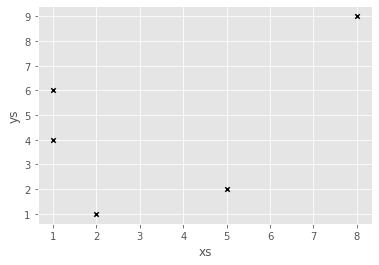

In [31]:
#  画出df的散点图

df.plot.scatter("xs", "ys", color = "black", marker = "x")

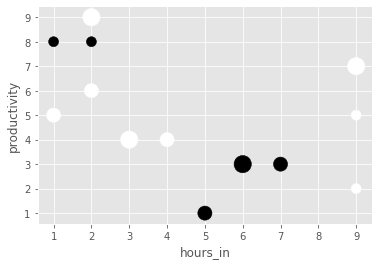

In [32]:
# 可视化指定4维DataFrame

df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 100, c = df.caffienated)

(-1, 12)

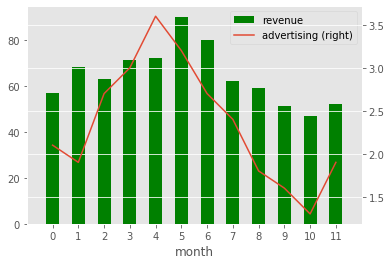

In [33]:
# 在同一个图中可视化2组数据，共用X轴，但y轴不同

df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))